## Fake data to visualize MWEM's histograms
MWEM works by first creating a uniformly distributed histogram out of real data. It then iteratively updates this histogram with noisy samples from the real data. In other words, using the multiplicative weights mechanism, MWEM updates the histograms "weights" via the DP exponential mechanism (for querying the original data).

Here, we create a heatmap from the histograms. We visualize the histogram made from the real data, and the differentially private histogram. Brighter values correspond to more higher probability bins in each histogram.

In [1]:
import os
import pandas as pd
import numpy as np
import random

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from opendp.smartnoise.synthesizers.mwem import MWEMSynthesizer

In [2]:
def plot_histo(title,histo):
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111)
    ax.set_title(title)
    plt.imshow(histo)
    ax.set_aspect('equal')
    cax = fig.add_axes([0.1, 1.0, 1., 0.1])
    cax.get_xaxis().set_visible(False)
    cax.get_yaxis().set_visible(False)
    cax.set_frame_on(False)
    plt.colorbar(orientation='horizontal')
    plt.show()


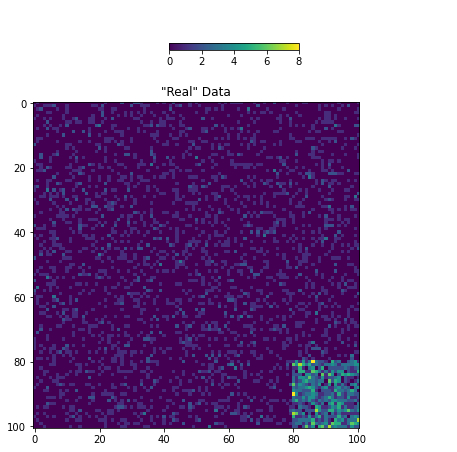

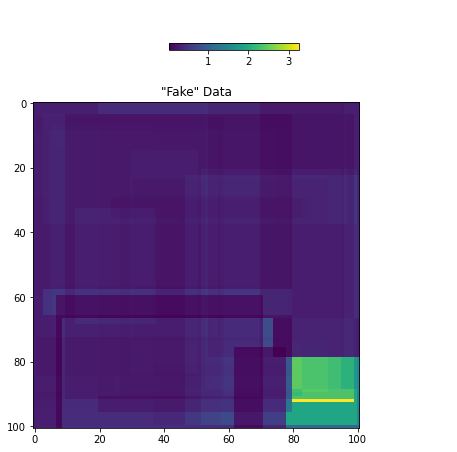

In [3]:
# Make ourselves some fake data, with a "hot-spot" in the distribution
# in the bottom right corner
df = pd.DataFrame({'fake_column_1': [random.randint(0,100) for i in range(3000)] + [random.randint(80,100) for i in range(1000)],
                   'fake_column_2': [random.randint(0,100) for i in range(3000)] + [random.randint(80,100) for i in range(1000)],})

synth = MWEMSynthesizer(10.0, 400, 30, 20,[[0,1]])
synth.fit(df)

plot_histo('"Real" Data', synth.synthetic_histograms[0][1])
plot_histo('"Fake" Data', synth.synthetic_histograms[0][0])

## Effect of Bin Count
Here we can visualize the effect of specifying a max_bin_count. In the original data, we have 100 bins. If we halve that, we see that we still do a pretty good job at capturing the overall distribution.

/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 101 in column: 0 exceeds max_bin_count, defaulting to: 50. Is this a continuous variable?
  warnings.warn(
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 101 in column: 1 exceeds max_bin_count, defaulting to: 50. Is this a continuous variable?
  warnings.warn(


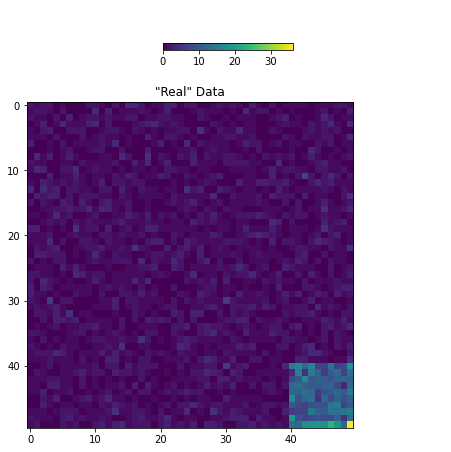

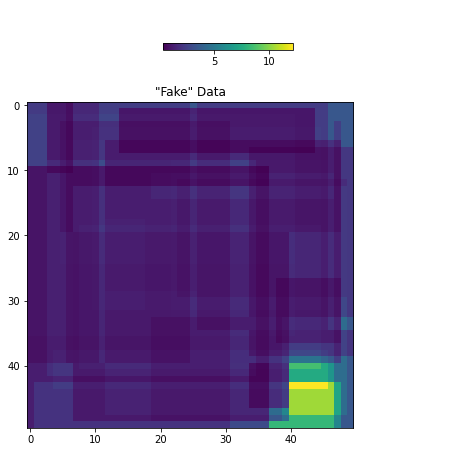

In [4]:
synth = MWEMSynthesizer(10.0, 400, 30, 20,[[0,1]], max_bin_count=50)
synth.fit(df)

plot_histo('"Real" Data', synth.synthetic_histograms[0][1])
plot_histo('"Fake" Data', synth.synthetic_histograms[0][0])